<a href="https://colab.research.google.com/github/Starleen1996/Challenger_1_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación


1- Crear dos listas, una que contiene las cuatro tiendas y otra que contiene la
suma de los ingresos de cada tienda en la columna "Precio"

2- Crear un bucle for creando una para cada tienda en la cual se almacena los valores de los ingresos resultados de las ventas y una variable con la suma de ingresos de cada tienda

3- Imprimir los valores de la suma de los ingresos de cada tienda a partir de la lista creada en el paso 1

In [10]:
# En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

tiendas = [tienda,tienda2,tienda3,tienda4]  # Lista de las tiendas
sumas_precios = [] #Lista para almacenar las sumas de cada tienda


for tienda in tiendas:
    precios = tienda["Precio"].tolist()
    suma = sum(precios)
    sumas_precios.append(suma)

print(f'Ingreso total: Tienda${sumas_precios[0]:,}, Tienda2 ${sumas_precios[1]:,}, Tienda3 ${sumas_precios[2]:,}, Tienda4 ${sumas_precios[3]:,}')


Ingreso total: Tienda$1,150,880,400.0, Tienda2 $1,116,343,500.0, Tienda3 $1,098,019,600.0, Tienda4 $1,038,375,700.0


#GRAFICAMOS EL RESULTADO DE LA FACTURACIÓN

## 1: Define los valores correctamente

In [11]:
import matplotlib.pyplot as plt

# Nombres de las tiendas (puedes ajustarlos si lo prefieres)
nombres_tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

# Ingresos como números (sin comas, sin símbolo $)
sumas_precios = [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

## 2 Graficamos la facturación correspondiente a la columna precio por tienda

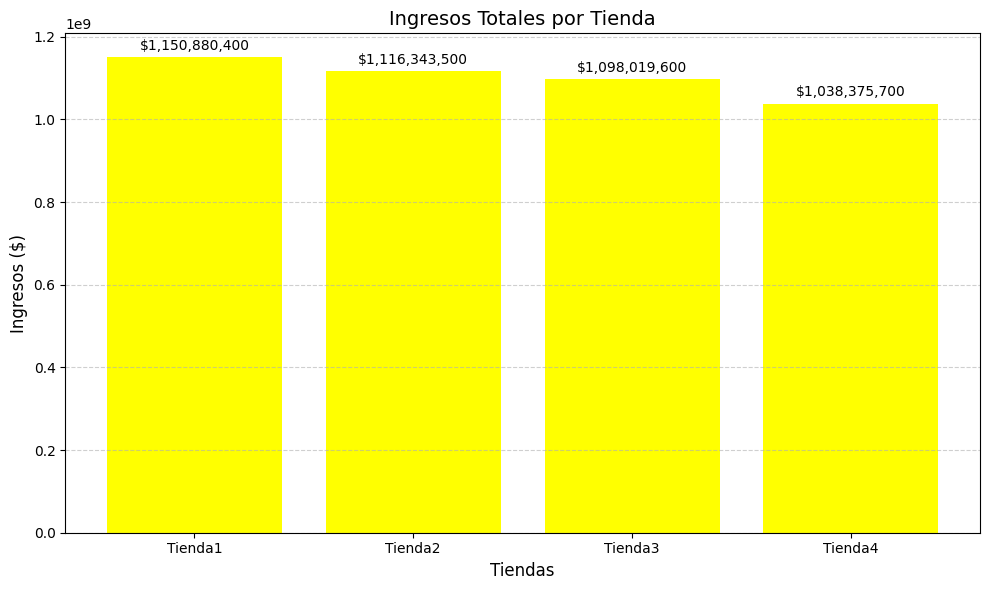

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(nombres_tiendas, sumas_precios, color='yellow')

# Añadir títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar los valores sobre cada barra
for i, valor in enumerate(sumas_precios):
    plt.text(i, valor + 1e7, f"${valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

### En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [19]:
#En este debes calcular la cantidad de productos vendidos por categoría en cada tienda.
#La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

def calcular_datos_producto(tienda):
    """
    Calcula el total de elementos y el precio total por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos y el precio total.
    """
    # Agrupa los datos por 'Categoria del Producto' y calcula el tamaño de cada grupo y la suma del precio.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        precio_total=('Precio', 'sum')
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['precio_total'])

    return diccionario_resultado

# Calcula los datos para cada tienda
tienda1_datos = calcular_datos_producto(tienda)
tienda2_datos = calcular_datos_producto(tienda2)
tienda3_datos = calcular_datos_producto(tienda3)
tienda4_datos = calcular_datos_producto(tienda4)

# Imprime los resultados de forma legible
print("Datos de la Tienda 1:")
for categoria, (total_elementos, precio_total) in tienda1_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 2:")
for categoria, (total_elementos, precio_total) in tienda2_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 3:")
for categoria, (total_elementos, precio_total) in tienda3_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 4:")
for categoria, (total_elementos, precio_total) in tienda4_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

Datos de la Tienda 1:
  Categoría: Artículos para el hogar, Total de Elementos: 201, Precio Total: $15,074,500
  Categoría: Deportes y diversión, Total de Elementos: 277, Precio Total: $33,350,100
  Categoría: Electrodomésticos, Total de Elementos: 254, Precio Total: $283,260,200
  Categoría: Electrónicos, Total de Elementos: 451, Precio Total: $409,476,100
  Categoría: Instrumentos musicales, Total de Elementos: 170, Precio Total: $75,102,400
  Categoría: Juguetes, Total de Elementos: 338, Precio Total: $20,262,200
  Categoría: Libros, Total de Elementos: 187, Precio Total: $9,321,300
  Categoría: Muebles, Total de Elementos: 480, Precio Total: $192,528,900

Datos de la Tienda 2:
  Categoría: Artículos para el hogar, Total de Elementos: 181, Precio Total: $14,746,900
  Categoría: Deportes y diversión, Total de Elementos: 275, Precio Total: $34,744,500
  Categoría: Electrodomésticos, Total de Elementos: 305, Precio Total: $348,567,800
  Categoría: Electrónicos, Total de Elementos: 422,

# 3. Calificación promedio de la tienda


## En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
# Con este código se obtiene la satisfacción del cliente por producto vendido en cada tienda

In [22]:
def calcular_calificacion_producto(tienda):
    """
    Calcula el total de elementos, la suma de calificaciones y la calificación media por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos, la suma de calificaciones y la calificación media.
              Ejemplo: {'Categoría A': (120, 450.5, 3.75), 'Categoría B': (85, 320.0, 3.76)}
    """
    # Agrupa los datos por 'Categoría del Producto' y calcula el tamaño de cada grupo, la suma de las calificaciones y la media de las calificaciones.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        suma_calificaciones=('Calificación', 'sum'),
        calificacion_media=('Calificación', 'mean')  # Agregamos el cálculo de la calificación media
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas (total_elementos, suma_calificaciones, calificacion_media)
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['suma_calificaciones'], value['calificacion_media'])

    return diccionario_resultado



# Calcula y muestra el resultado para cada tienda
resultados = {
    "Tienda ": calcular_calificacion_producto(tienda),
    "Tienda 2": calcular_calificacion_producto(tienda2),
    "Tienda 3": calcular_calificacion_producto(tienda3),
    "Tienda 4": calcular_calificacion_producto(tienda4)
}

# Imprime los resultados
for nombre_tienda, resultado in resultados.items():
    print(f"\n{nombre_tienda}:")
    for categoria, (total_elementos, suma_calificaciones, calificacion_media) in resultado.items():
        print(f"  {categoria}: Total de elementos = {total_elementos}, Suma de calificaciones = {suma_calificaciones:.2f}, Calificación media = {calificacion_media:.2f}")



Tienda :
  Artículos para el hogar: Total de elementos = 201, Suma de calificaciones = 806.00, Calificación media = 4.01
  Deportes y diversión: Total de elementos = 277, Suma de calificaciones = 1123.00, Calificación media = 4.05
  Electrodomésticos: Total de elementos = 254, Suma de calificaciones = 998.00, Calificación media = 3.93
  Electrónicos: Total de elementos = 451, Suma de calificaciones = 1807.00, Calificación media = 4.01
  Instrumentos musicales: Total de elementos = 170, Suma de calificaciones = 665.00, Calificación media = 3.91
  Juguetes: Total de elementos = 338, Suma de calificaciones = 1348.00, Calificación media = 3.99
  Libros: Total de elementos = 187, Suma de calificaciones = 756.00, Calificación media = 4.04
  Muebles: Total de elementos = 480, Suma de calificaciones = 1919.00, Calificación media = 4.00

Tienda 2:
  Artículos para el hogar: Total de elementos = 181, Suma de calificaciones = 737.00, Calificación media = 4.07
  Deportes y diversión: Total de ele

## Graficamos los resultados de los promedio de calificaciones de cada tienda

In [23]:
import matplotlib.pyplot as plt

# Diccionario donde se guardarán los promedios de calificación por tienda
promedios_por_tienda = {}

# Recorremos los resultados y calculamos el promedio de calificaciones por tienda
for nombre_tienda, resultado in resultados.items():
    # Extrae solo las calificaciones medias
    calificaciones = [datos[2] for datos in resultado.values()]
    # Calcula el promedio general de la tienda
    promedio = sum(calificaciones) / len(calificaciones) if calificaciones else 0
    promedios_por_tienda[nombre_tienda] = promedio

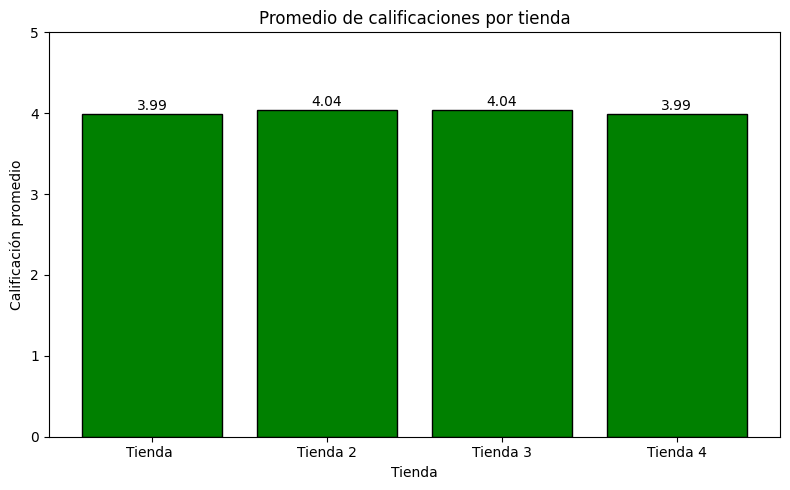

In [25]:
# Extraer nombres de tiendas y promedios
nombres_tiendas = list(promedios_por_tienda.keys())
valores_promedios = list(promedios_por_tienda.values())

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, valores_promedios, color='green', edgecolor='black')

# Añadir títulos y etiquetas
plt.title("Promedio de calificaciones por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)  # Asumimos escala de calificación de 0 a 5

# Mostrar el valor encima de cada barra
for i, valor in enumerate(valores_promedios):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda